# Advertising Campaign for 2017

The aim of this analytics report is to identify which game will succeed in 2017 and hence focus the next advertising campaign on it. This study is based on data provided from 2016.

**TABLE OF CONTENTS**
* 1. [Open Data](#chapter1)
* 2. [Prepare Data](#chapter2)
    * 2.1 [Column Naming](#chapter2.1)
    * 2.2 [Missing Values](#chapter2.2)
    * 2.3 [Duplicates](#chapter2.3)
    * 2.4 [Data Types](#chapter2.4)
    * 2.5 [Global Sales](#chapter2.5)
    * 2.6 [Conclusion](#chapter2.6)
* 3. [Data Analysis](#chapter3)
    * 3.1 [Games Release per Year](#chapter3.1)
    * 3.2 [Global Sales by Platform](#chapter3.2)
    * 3.3 [Platform Sales over Time](#chapter3.3)
    * 3.4 [Sample Data](#chapter3.4)
    * 3.5 [Platform Analysis](#chapter3.5)
    * 3.6 [Sales & Reviews Correlation](#chapter3.6)
    * 3.7 [Sales & Genres Correlation](#chapter3.7)
    * 3.8 [Conclusion](#chapter3.8)
* 4. [Analysis by Region](#chapter4)
* 5. [Hypotheses](#chapter5)
* 6. [Overall Conclusion](#chapter6)

## 1. Opening Data <a class="anchor" id="chapter1"></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
try:
    data = pd.read_csv(r"D:\Practicum100\Datasets\games.csv")
except:
    data = pd.read_csv('/datasets/games.csv')

In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


We have a dataset with 16,715 entries and 11 columns. We can already observe some columns have missing or null values, and data types will need to be adjusted as well. Let's polish the data for the further analysis. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Great, data is downloaded and ready for the further preparation and analysis.
</div>

## 2. Preparing Data  <a class="anchor" id="chapter2"></a>

### 2.1 Column Naming <a class="anchor" id="chapter2.1"></a>

Lower case the column names, as the analysis code is case-sensitive.

In [6]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
data.columns = ["name", "platform", "year_of_release", "genre", "na_sales", "eu_sales", "jp_sales", "other_sales", "critic_score", "user_score", "rating"]
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2.2 Missing Values <a class="anchor" id="chapter2.2"></a>

First we check the proportion of missing values per column:

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

These are considerable amount of missing values. Before we will them in with medians, means or modes, we will try to replace these missing values by merging this dataset with another from Megacritic, which contains over 400k entries of games, with their release year and ratings.

**KAGGLE DATASET PREPROCESSING**

In [9]:
import pandas as pd
from io import BytesIO
import requests
spreadsheet_id = '1AFrRdJ1pdOwqul_DplBFM9sWwacRFBxzu74ZYNy-aPk'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
kaggle = pd.read_csv(BytesIO(r.content))
kaggle

,Unnamed: 0,name,metacritic,rating,esrb_rating
0,0,D/Generation HD,NaN,0.0,Everyone 10+
1,1,G Prime Into The Rain,NaN,0.0,Everyone
2,2,Land Sliders,NaN,0.0,Everyone 10+
3,3,Pixel Gear,NaN,0.0,Teen
4,4,Gods and Idols,NaN,0.0,NaN
...,...,...,...,...,...
474412,474412,Holy or Dead,NaN,0.0,NaN
474413,474413,Airstrike HD Demo,NaN,0.0,NaN
474414,474414,Urania's Mirror,NaN,0.0,NaN
474415,474415,Simucities,NaN,0.0,NaN


In [10]:
kaggle["esrb_rating"]= kaggle["esrb_rating"].replace(["Everyone 10+"], 'E10+')

In [11]:
kaggle["esrb_rating"]= kaggle["esrb_rating"].replace(["Teen"], 'T')

In [12]:
kaggle["esrb_rating"]= kaggle["esrb_rating"].replace(["Mature"], 'M')

In [13]:
kaggle["esrb_rating"]= kaggle["esrb_rating"].replace(["Everyone"], 'E')

In [14]:
kaggle["esrb_rating"]= kaggle["esrb_rating"].replace(["Adults Only"], 'AO')

In [15]:
kaggle["esrb_rating"]= kaggle["esrb_rating"].replace(["Rating Pending"], 'RP')

In [16]:
kaggle["esrb_rating"].value_counts()

E10+    36682
T       10031
M        4859
E        3837
AO        405
RP         50
Name: esrb_rating, dtype: int64

In [17]:
kaggle.head()

,Unnamed: 0,name,metacritic,rating,esrb_rating
0,0,D/Generation HD,NaN,0.0,E10+
1,1,G Prime Into The Rain,NaN,0.0,E
2,2,Land Sliders,NaN,0.0,E10+
3,3,Pixel Gear,NaN,0.0,T
4,4,Gods and Idols,NaN,0.0,NaN


In [18]:
kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474417 entries, 0 to 474416
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   474417 non-null  int64  
 1   name         474415 non-null  object 
 2   metacritic   4733 non-null    float64
 3   rating       474417 non-null  float64
 4   esrb_rating  55864 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 18.1+ MB


In [19]:
games_names = data["name"].unique()

In [20]:
kaggle = kaggle[kaggle.name.isin(games_names)]

In [21]:
newdata = data.merge(kaggle, on="name", how="left")

In [22]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16716
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16717 non-null  object 
 2   year_of_release  16448 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16717 non-null  float64
 5   eu_sales         16717 non-null  float64
 6   jp_sales         16717 non-null  float64
 7   other_sales      16717 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating_x         9949 non-null   object 
 11  Unnamed: 0       9824 non-null   float64
 12  metacritic       2346 non-null   float64
 13  rating_y         9824 non-null   float64
 14  esrb_rating      3448 non-null   object 
dtypes: float64(9), object(6)
memory usage: 2.0+ MB


In [23]:
newdata.isna().sum()

name                   4
platform               0
year_of_release      269
genre                  4
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        8580
user_score          6703
rating_x            6768
Unnamed: 0          6893
metacritic         14371
rating_y            6893
esrb_rating        13269
dtype: int64

**name**

In [24]:
newdata["name"]=newdata["name"].fillna("missing")

The missing values from "name" column seem to be very incomplete; they barely have sales and no reviews or rating whatsoever. Since these are only 2 entries out of 16715, we will drop them.

In [25]:
newdata["name"].loc[newdata["name"]=="missing"]

659      missing
660      missing
14245    missing
14246    missing
Name: name, dtype: object

In [26]:
newdata = newdata.drop([659, 660, 14245, 14246])

In [27]:
newdata.isna().sum()

name                   0
platform               0
year_of_release      269
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        8576
user_score          6699
rating_x            6764
Unnamed: 0          6893
metacritic         14367
rating_y            6893
esrb_rating        13265
dtype: int64

As the year of release can be related to the platform, we can pull the median year of release per platform and assign it to the missing values of each platform accordingly. 

We chose the median as it would be the "middle" value of all games' year of release for that platformm (and it is usually the most common value as well). Platforms don't have a wide popularity lifespan, as it is a very fast-paced industry, so the median would be quite accurate in this case. 

In [28]:
newdata["year_of_release"] = newdata.groupby("name")["year_of_release"].transform(
    lambda grp: grp.fillna(grp.median()))

In [29]:
newdata["year_of_release"] = newdata["year_of_release"].round()

In [30]:
newdata.isnull().sum()

name                   0
platform               0
year_of_release      146
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        8576
user_score          6699
rating_x            6764
Unnamed: 0          6893
metacritic         14367
rating_y            6893
esrb_rating        13265
dtype: int64

Good! We have replaced the missing values in "year_of_release" with the median value of the corresponding platform for each entry. There are still 146 entries whose missing values could not be replaced though. They only represent 0.87% of the dataset, so we will drop them.

In [31]:
newdata = newdata.dropna(subset=['year_of_release'])

In [32]:
newdata.isnull().sum()

name                   0
platform               0
year_of_release        0
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        8492
user_score          6633
rating_x            6699
Unnamed: 0          6842
metacritic         14233
rating_y            6842
esrb_rating        13140
dtype: int64

We will try to replace the missing values with the corresponding columns from the kaggle dataset.

In [33]:
newdata["critic_score"]=newdata["critic_score"].fillna(value=newdata['metacritic'])

In [34]:
newdata["user_score"]=newdata["user_score"].fillna(newdata['rating_y'])

In [35]:
newdata["rating_x"]=newdata["rating_x"].fillna(newdata['esrb_rating'])

In [36]:
newdata.isnull().sum()

name                   0
platform               0
year_of_release        0
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        8144
user_score          4201
rating_x            6206
Unnamed: 0          6842
metacritic         14233
rating_y            6842
esrb_rating        13140
dtype: int64

We were able to get rid of some missing values, but there are still some left. We will need to continue with these as they are though.

In [37]:
#Dropping unnecessary columns imported from kaggle
newdata = newdata.drop(labels=["metacritic", "rating_y", "esrb_rating"], axis="columns")

In [38]:
newdata = newdata.rename(columns={"rating_x": "rating"})

In [39]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16716
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8423 non-null   float64
 9   user_score       12366 non-null  object 
 10  rating           10361 non-null  object 
 11  Unnamed: 0       9725 non-null   float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


In [40]:
newdata.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8144
user_score         4201
rating             6206
Unnamed: 0         6842
dtype: int64

Let's try to replace the remaining missing values. For rating, we will use the genre as basis to fill them..

In [41]:
newdata["rating"] = newdata.groupby("genre")["rating"].apply(
    lambda grp: grp.fillna(grp.value_counts().index[0]))

In [42]:
newdata["rating"].value_counts()

E       7604
T       5454
M       1923
E10+    1565
EC         8
AO         7
K-A        3
RP         3
Name: rating, dtype: int64

In [43]:
newdata.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8144
user_score         4201
rating                0
Unnamed: 0         6842
dtype: int64

In [44]:
newdata["critic_score"].value_counts()

71.0    259
70.0    259
75.0    251
78.0    250
80.0    250
       ... 
29.0      3
99.0      2
17.0      1
21.0      1
13.0      1
Name: critic_score, Length: 82, dtype: int64

In this sub section we have dealt with quite a number of missing values. The big amount indicates that the dataset has not been updated for a long time, for example, user_scores still have TBD in many games that are a couple of years old now, same with critics reviews and esrb ratings; these are published after a certain amount of reviews is reached. 

As per year of release, the reason could be that some games were released long time ago, or again, the dataset was not maintained properly.

### 2.3 Duplicates<a class="anchor" id="chapter2.3"></a>

We will check first for duplicates:

In [45]:
newdata["name"] = newdata["name"].str.lower()

In [46]:
newdata["platform"] = newdata["platform"].str.lower()

In [47]:
newdata["genre"] = newdata["genre"].str.lower()

In [48]:
newdata.duplicated().sum()

0

### 2.4 Data Types <a class="anchor" id="chapter2.4"></a>

With no missing values left, we can adjust the data types.

In [49]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16716
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8423 non-null   float64
 9   user_score       12366 non-null  object 
 10  rating           16567 non-null  object 
 11  Unnamed: 0       9725 non-null   float64
dtypes: float64(7), object(5)
memory usage: 2.3+ MB


In [50]:
newdata["year_of_release"] = newdata["year_of_release"].round().astype("int")

User score is an "object" because there is a "TBD" value there, "to be determined". We will assume this value is given to those games who did not get enough number of reviews to display an average.  We still need to convert this column to numerical values though, as it is currently "string".

In [51]:
newdata.loc[newdata["user_score"]=="tbd"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,Unnamed: 0
119,zumba fitness,wii,2010,sports,3.45,2.59,0.0,0.66,NaN,tbd,E,126453.0
301,namco museum: 50th anniversary,ps2,2005,misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,NaN
520,zumba fitness 2,wii,2011,sports,1.51,1.03,0.0,0.27,NaN,tbd,T,144833.0
645,udraw studio,wii,2010,misc,1.65,0.57,0.0,0.20,71.0,tbd,E,NaN
719,just dance kids,wii,2010,misc,1.52,0.54,0.0,0.18,NaN,tbd,E,166437.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16697,planet monsters,gba,2001,action,0.01,0.00,0.0,0.00,67.0,tbd,E,NaN
16699,bust-a-move 3000,gc,2003,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,NaN
16700,mega brain boost,ds,2008,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,155090.0
16706,plushees,ds,2008,simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,155747.0


In [52]:
newdata["user_score"].value_counts()

tbd     2394
0.0     1665
7.8      324
8        288
8.2      279
        ... 
9.7        1
2.67       1
3.99       1
4.62       1
2.82       1
Name: user_score, Length: 248, dtype: int64

In [53]:
newdata["user_score"] = pd.to_numeric(newdata["user_score"], errors = "coerce")

In [54]:
newdata["user_score"].value_counts()

0.00    1666
7.80     324
8.00     288
8.20     279
8.30     253
        ... 
2.71       1
2.44       1
3.22       1
3.48       1
3.24       1
Name: user_score, Length: 227, dtype: int64

In [55]:
newdata.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8144
user_score         6595
rating                0
Unnamed: 0         6842
dtype: int64

In [56]:
newdata["user_score"] =newdata["user_score"].astype("float") 

In [57]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16716
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int32  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8423 non-null   float64
 9   user_score       9972 non-null   float64
 10  rating           16567 non-null  object 
 11  Unnamed: 0       9725 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 2.2+ MB


We now have the right data types. User_score "tbd" values have been replaced by a numerical "nan", so we will still have missing values but at least the column is now a float, which will allow us to perform calculations and graphs later on.

The last step is to create a new column that holds the total sales for each game.

### 2.5 Global Sales<a class="anchor" id="chapter2.5"></a>

In [58]:
newdata["total_sales"] = newdata["na_sales"]+newdata["eu_sales"]+newdata["jp_sales"]
newdata.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,Unnamed: 0,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.00,E,152116.0,74.09
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,4.27,E,152285.0,39.47
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.30,E,149304.0,32.23
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.00,E,161084.0,29.82
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,T,NaN,30.38


### 2.6 Conclusion <a class="anchor" id="chapter2.6"></a>

* In this section, we realized how outdated this dataset is. It has a big amount of missing values in reviews from games that were released years ago. 

* We tried to fill them in by merging the columns with a more updated dataset found in a reliable source, which decreased the amount of missing values, but there we still too many to be ignored. 

* We adjusted the data types in order to e able to perform calculations in the next steps (to numerical values).

* We checked for duplicates, and didn't find any.
* We added a column with the sum of sales of every region: Total_sales 


## 3. Analyzing Data <a class="anchor" id="chapter3"></a>

### 3.1 Games Released per Year<a class="anchor" id="chapter3.1"></a>

In [59]:
conda install seaborn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [60]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [61]:
df = newdata[{'year_of_release', 'name'}].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()
df

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


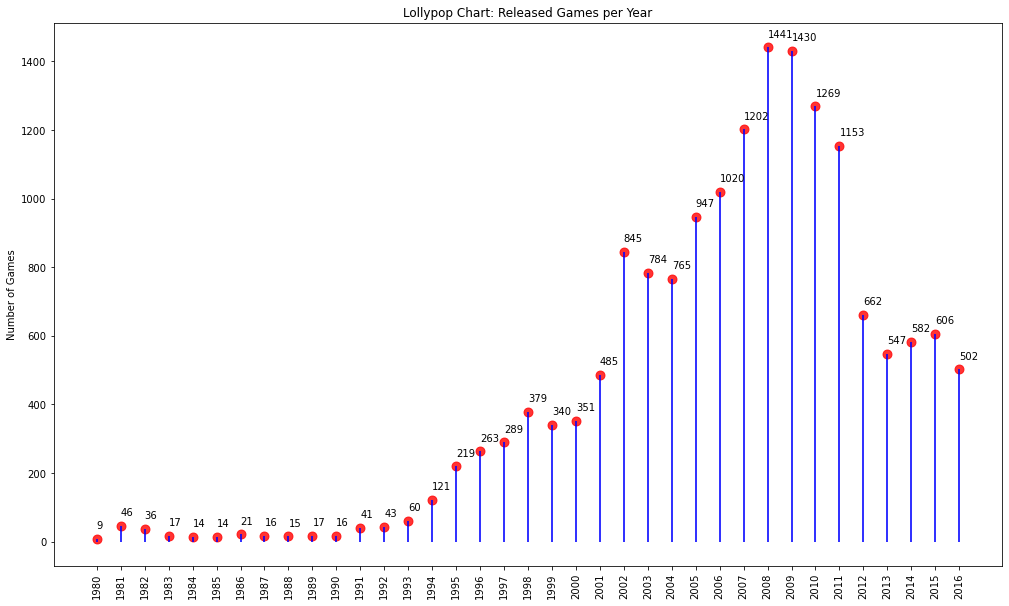

In [62]:
fig, ax=plt.subplots(figsize=(17,10));
ax.vlines(x=df['year_of_release'], ymin=0, ymax=df['name'], color='blue', alpha=0.8, linewidth=2);
ax.scatter(x=df['year_of_release'], y=df['name'], s=80, color='red', alpha=0.8);

#Labels
ax.set_title('Lollypop Chart: Released Games per Year');
ax.set_ylabel('Number of Games');
ax.set_xticks(df["year_of_release"]);
ax.set_xticklabels(df.year_of_release,rotation=90);

for row in df.itertuples():
    ax.text(row.year_of_release, row.name+30, s=round(row.name, 2))

Between 1980 and 1993 it seems video games were either not popular at all. They were definitely not the favourite or affordable form of entertainment.

As of 1994 though, the release rate tripled. This could be due to an increase in the marketing campaigns, or a breakthrough advance in the gaming industry (visual quality for example).

The release numbers increased since then, reaching the highest points between 2005 and 2011, and within them, the highest peaks were 2008 and 2009. In the histogram we can see the data is skewed to the left, as there is a huge drop after 2011 (global sales drop by almost 50%).

Some reasons are the lack of exciting content in the release of new games, or poor game development, or the economic crisis that hit worldwide. 

Let's look at the sales now, by platform.

### 3.2 Sales by Platform <a class="anchor" id="chapter3.2"></a>

Let's look at how sales varied from platform to platform.

In [63]:
platform_sales = newdata.pivot_table(index="platform", values="total_sales", aggfunc="sum").reset_index()
platform_sales.sort_values(by="total_sales", ascending=False)

,platform,total_sales
16,ps2,1054.88
28,x360,881.27
25,wii,824.54
17,ps3,800.09
4,ds,745.12
15,ps,686.89
6,gba,306.11
18,ps4,265.79
19,psp,252.15
29,xb,248.01


We could say that the platform with the greatest totals are those with over 650 million USD in global sales.

Now, we will see which platforms are profitable. 

We will do so by calculating the Z value, which calculates how far the total_sales number is from the mean value of the platform.

Those values that are above the mean, indicate that the platform is profitable. 

In [64]:
platform_sales['sales_z'] = (platform_sales['total_sales']-platform_sales['total_sales'].mean())/platform_sales['total_sales'].std()
platform_sales = platform_sales.sort_values('sales_z', ascending=False)
platform_sales

,platform,total_sales,sales_z
16,ps2,1054.88,2.591629
28,x360,881.27,2.025095
25,wii,824.54,1.839971
17,ps3,800.09,1.760184
4,ds,745.12,1.580803
15,ps,686.89,1.390784
6,gba,306.11,0.148202
18,ps4,265.79,0.016628
19,psp,252.15,-0.027883
29,xb,248.01,-0.041393


We can already see that there are only a few profitable platforms: PS2, X360, Wii, PS3, DS, PS, GBA and PS4

In [65]:
platform_sales['color'] = ['red' if x<0 else 'green' for x in platform_sales['sales_z']]

In [66]:
platform_sales.head()

,platform,total_sales,sales_z,color
16,ps2,1054.88,2.591629,green
28,x360,881.27,2.025095,green
25,wii,824.54,1.839971,green
17,ps3,800.09,1.760184,green
4,ds,745.12,1.580803,green


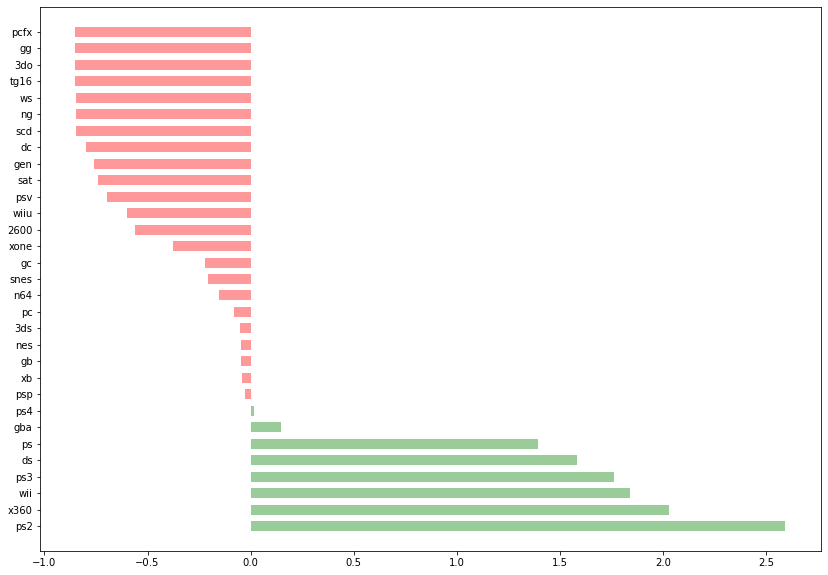

In [67]:
plt.figure(figsize=(14,10))
plt.hlines(
    y=platform_sales['platform'], 
    xmax=platform_sales['sales_z'], 
    xmin=0, 
    color=platform_sales['color'], 
    alpha=0.4, 
    linewidth=10);


This divergent bar chart shows the visual representation of platform profitability, calculated with the Z value per platform.

We have to take into account that this is based on the sum of global sales per platform since its existence. A more accurate result could be provided by the average sales per year per platform. 

However, this already gives us a general overview.

In [68]:
best_platforms = newdata.query('platform == ["ps2", "x360", "wii", "ps3", "ds"]')

In [69]:
best_platforms_pivot = best_platforms.pivot_table(index=["platform", "year_of_release"], values="total_sales", aggfunc="sum")

In [70]:
best_platforms_pivot

total_sales
platform year_of_release             
ds       1985                    0.02
         2004                   15.91
         2005                  119.34
         2006                  111.64
         2007                  136.12
         2008                  134.42
         2009                  111.01
         2010                   79.79
         2011                   24.44
         2012                   11.01
         2013                    1.42
ps2      2000                   35.59
         2001                  149.65
         2002                  186.26
         2003                  171.14
         2004                  172.79
         2005                  141.51
         2006                   89.92
         2007                   52.40
         2008                   34.59
         2009                   16.24
         2010                    4.44
         2011                    0.35
ps3      2005                    0.15
         2006                   17.78
         2007                   62.48
         2008                  102.03
         2009                  113.08
         2010                  122.06
         2011                  136.21
         2012                   91.64
         2013                   95.85
         2014                   40.88
         2015                   14.70
         2016                    3.23
wii      2006                  126.37
         2007                  139.79
         2008                  162.17
         2009                  189.43
         2010                  118.41
         2011                   54.50
         2012                   21.33
         2013                    7.87
         2014                    3.45
         2015                    1.05
         2016                    0.17
x360     2005                    8.51
         2006                   47.36
         2007                   86.68
         2008                  123.29
         2009                  109.74
         2010                  156.28
         2011                  132.38
         2012                   92.34
         2013                   80.82
         2014                   31.61
         2015                   10.86
         2016                    1.40

In [71]:
ps2 = best_platforms.query('platform == "ps2"')

In [72]:
x360 = best_platforms.query('platform == "x360"')

In [73]:
wii = best_platforms.query('platform == "wii"')

In [74]:
ps3 = best_platforms.query('platform == "ps3"')

In [75]:
ds = best_platforms.query('platform == "ds"')

**Choose the platforms with the greatest total sales and build a distribution based on data for each year**

We have chosen the top 4 platforms based on global sales between years 1980 and 2016. We will now visualize their data distribution, and then go deeper into each of these platforms. Since sales values are continuous variables, we will choose Density Histograms.

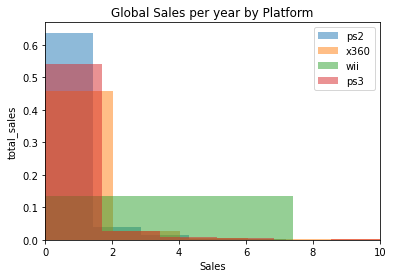

In [76]:
plt.hist(ps2["total_sales"], density=True, alpha=0.5);
plt.hist(x360["total_sales"], density=True, alpha=0.5);
plt.hist(wii["total_sales"], density=True, alpha=0.5);
plt.hist(ps3["total_sales"], density=True, alpha=0.5);

plt.title("Global Sales per year by Platform")
plt.legend(('ps2', 'x360', 'wii', 'ps3'), loc='upper right')
plt.xlabel("Sales")
plt.ylabel("total_sales")
plt.xlim(0, 10)
plt.show()


With the exception of wii, the data from these platforms is very positively skewed. There are also many outliers, which we will have to take into account at a later stage in order to have a more accurate analysis. 

### 3.3 Popularity Decrease Platforms<a class="anchor" id="chapter3.3"></a>

**Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?**

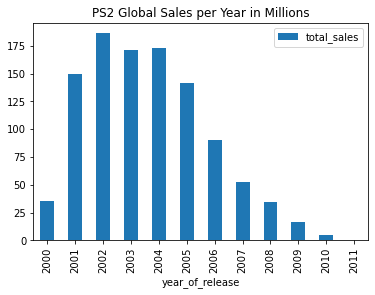

In [77]:
ps2.pivot_table(index="year_of_release", values="total_sales", aggfunc="sum").plot(
    title = "PS2 Global Sales per Year in Millions",
    kind= "bar");

PS2 console was released in March 2000, but the sales peak began in 2001 all the way to 2005. After 2005, sales declined, due to the upcoming console, PS3, which was appeared in the market in November 2006.

We could say that the span of popularity for PS2 was 6 years (2001 - 2006, both inclusive).
It also took 3-4 years to fade - from 2008 onwards.

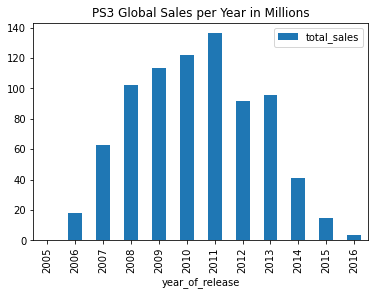

In [78]:
ps3.pivot_table(index="year_of_release", values="total_sales", aggfunc="sum").plot(
    title = "PS3 Global Sales per Year in Millions",
    kind= "bar");

As expected, sales in PS3 games peaked right after its release- since it was end of 2006, the sales increased as of 2007 all the way to 2013, which is when the PS4 came out. 

The year-span of popularity is 7 years from 2007 to 2013.
It faded quite fast after 2013. 

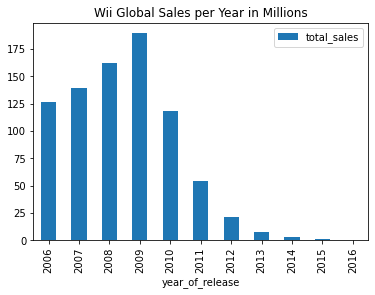

In [79]:
wii.pivot_table(index="year_of_release", values="total_sales", aggfunc="sum").plot(
    title = "Wii Global Sales per Year in Millions",
    kind= "bar");

Wii was introduced in 2006, and their sales on the first year of release were 3 times higher compared to those of PS2 and PS3. Perhaps due to the innovative wireless concept, or new console gamma overall. The data here looks very skewerd to the right, compared tot he other platforms.

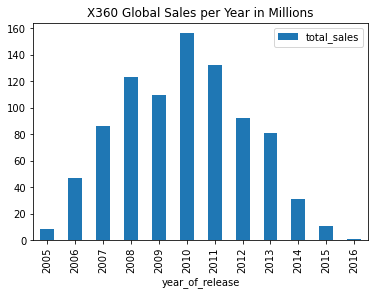

In [80]:
x360.pivot_table(index="year_of_release", values="total_sales", aggfunc="sum").plot(
    title = "X360 Global Sales per Year in Millions",
    kind= "bar");

The xBox360 was introduced at the end of 2005. It reached the highest popularity level in 2010, and dropped after 2013 - might be due to the Xbox One release.
The data shows a ver normal distribution at first sight.

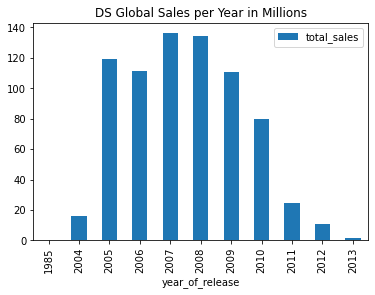

In [81]:
ds.pivot_table(index="year_of_release", values="total_sales", aggfunc="sum").plot(
    title = "DS Global Sales per Year in Millions",
    kind= "bar");

We can already see there is an outlier here. DS was not released before 2004. We will need to get rid of it:

In [82]:
newdata = newdata.drop(newdata[(newdata["platform"]=="ds") & (newdata["year_of_release"]<2004)].index)

In [83]:
best_platforms = newdata.query('platform == ["ps2", "x360", "wii", "ps3", "ds"]')

In [84]:
ds = best_platforms.query('platform == "ds"')

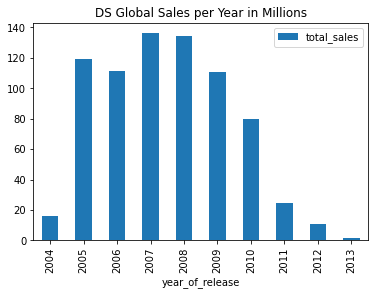

In [85]:
ds.pivot_table(index="year_of_release", values="total_sales", aggfunc="sum").plot(
    title = "DS Global Sales per Year in Millions",
    kind= "bar");

DS Console was also popular as soon as it was released. Just like Wii, it peaked it sales 3 times more than the PS gamma and Xbox during its first year in the market. It was a new concept as well, a portable console. 

Its popularity lasted for 6 years (2005 to 2010 inclusive), and faded in just 3.

The distribution is slightly normalized, but we would need to verify to obtain an accurate answer. 

Overall, these once popular platforms held their popularity for about 6 years, and faded in less than 3.

### 3.4 Selecting Sample Data<a class="anchor" id="chapter3.4"></a>

We have pulled and analyzed the best platforms based on total sales. Then we analyzed them individually, each with their global sales per year, to have an idea of how the data is distributed. We were also able to see how long their popularity lasted, and how fast they faded. 

Based on what we know so far, we will select the period of time that contains the most relevant data for us to build a prognosis for 2017.

The gaming industry is a fast-paced growing world. As technology improves, so do videogames. Based on this and the data we pulled from the most popular platforms (based on global sales), as we look into the near future, we will take into account the last relevant few years from this dataset. Due to the constantly growing market, it makes no sense to take a very long period of time, because sales are cumulative, hence the older the platform, the higher the chances for having a much higher revenue.

Therefore, moving forward, as platforms seem to keep their sales at peak for 5-6 years, and fade in less than 3, we will proceed our analysis with data from years 2014 to 2016.

In [86]:
sampledata = newdata.query('year_of_release >= 2014')
sampledata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 31 to 16716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1690 non-null   object 
 1   platform         1690 non-null   object 
 2   year_of_release  1690 non-null   int32  
 3   genre            1690 non-null   object 
 4   na_sales         1690 non-null   float64
 5   eu_sales         1690 non-null   float64
 6   jp_sales         1690 non-null   float64
 7   other_sales      1690 non-null   float64
 8   critic_score     858 non-null    float64
 9   user_score       1128 non-null   float64
 10  rating           1690 non-null   object 
 11  Unnamed: 0       914 non-null    float64
 12  total_sales      1690 non-null   float64
dtypes: float64(8), int32(1), object(4)
memory usage: 178.2+ KB


In [87]:
sampledata.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,Unnamed: 0,total_sales
count,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,858.000000,1128.000000,914.000000,1690.000000
mean,2014.952663,0.168118,0.160314,0.055083,0.048320,73.322844,5.502686,225207.890591,0.383515
std,0.799724,0.446009,0.466713,0.211455,0.141748,11.972527,2.722856,108917.025777,0.924617
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,413.000000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,67.000000,4.090000,172453.000000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,75.000000,6.400000,234878.500000,0.090000
75%,2016.000000,0.120000,0.120000,0.040000,0.040000,82.000000,7.600000,265328.250000,0.310000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,474207.000000,12.250000


We are now working with a dataset of 5321 entries, which includes games released between 2010 and 2016.

### 3.5 Sample data: Platform analysis<a class="anchor" id="chapter3.5"></a>

* Platforms are leading in sales.
* Platforms growing or shrinking.
* Profitable platforms

**3.5.1 Platforms leading in Sales**

In [88]:
!pip install squarify
import squarify

In [89]:
import squarify

In [90]:
sampledata_tree = sampledata[["platform", "total_sales"]].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()
sampledata_tree

,platform,total_sales
0,psp,0.36
1,wii,4.67
2,psv,20.59
3,pc,25.51
4,wiiu,39.82
5,x360,43.87
6,ps3,58.81
7,3ds,83.00
8,xone,127.84
9,ps4,243.67


In [91]:
#determine size with column 'total_sales', passing the result as a list
sizes=sampledata_tree.total_sales.values.tolist()
sizes

[0.36000000000000004,
 4.669999999999999,
 20.590000000000106,
 25.510000000000034,
 39.82000000000001,
 43.87000000000003,
 58.81000000000006,
 83.0000000000001,
 127.84000000000009,
 243.6700000000004]

In [92]:
#For labels, we apply a function across the columns
labels= sampledata_tree.apply(lambda x: str(x[0])+'\n'+'$'+str(round(x[1])), axis=1)
labels

0       psp\n$0
1       wii\n$5
2      psv\n$21
3       pc\n$26
4     wiiu\n$40
5     x360\n$44
6      ps3\n$59
7      3ds\n$83
8    xone\n$128
9     ps4\n$244
dtype: object

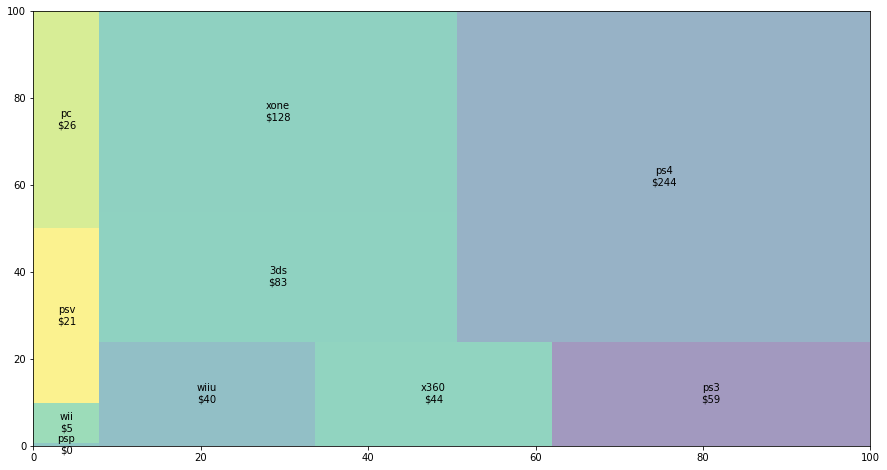

In [93]:
plt.figure(figsize=(15,8));
squarify.plot(sizes=sizes, label=labels, alpha=0.5);

The above graph represents the share of the revenue generated by each platform from our sample data, in other words, the distribution of sales across platforms.

In [94]:
sampledata.pivot_table(index=["platform"], values="total_sales", aggfunc="sum").sort_values("total_sales", ascending=False).head()

,total_sales
platform,
ps4,243.67
xone,127.84
3ds,83.00
ps3,58.81
x360,43.87


The platforms leading in global sales between 2014 and 2016 are the **PS4 and xOne**.

**3.5.2 Which Platforms are Growing or Shrinking**

In [95]:
df = sampledata.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)
df

platform,3ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,
2014,41.75,12.69,40.88,84.22,0.24,10.56,3.45,20.35,31.61,49.26
2015,26.75,7.93,14.70,100.44,0.12,5.93,1.05,15.22,10.86,54.67
2016,14.50,4.89,3.23,59.01,0.00,4.10,0.17,4.25,1.40,23.91


The table above shows an overview of the global sales per platform with game releases between 2014 and 2016. 

We see already that some are fading faster than others in the market.

For example, x360 had a very sudden drop in sales right between 2014 and 2015, by around 60%!
Others, like xOne and Wii, have a much slower decline of sales over time. 

In [96]:
ps4_sales = sampledata.query('platform in "ps4"').pivot_table(index=["year_of_release"], values="total_sales", aggfunc="sum")

In [97]:
xone_sales = sampledata.query('platform in "xone"').pivot_table(index=["year_of_release"], values="total_sales", aggfunc="sum")

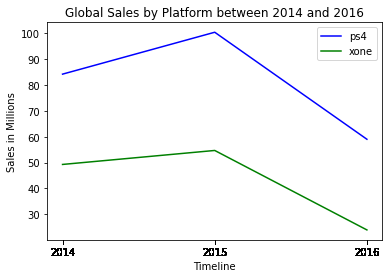

In [98]:
#LINE CHART WITH SALES EVOLUTION
x = sampledata['year_of_release']
y_sales_ps4 = ps4_sales
y_sales_xone = xone_sales

#plot lines and assign color
plt.plot(y_sales_ps4, color="blue")
plt.plot(y_sales_xone, color="green")


#labels
plt.title("Global Sales by Platform between 2014 and 2016")
plt.xlabel("Timeline")
plt.ylabel("Sales in Millions")
plt.xticks(x)

#legend
plt.legend(('ps4', 'xone'), loc='upper right')

plt.show()

In the lined graph we can see the timeline of global sales from the platforms that accumulate the biggest sales between 2014 and 2016.

We see that even though these were once very profitable, their games popularity is decreasing, probably due to new platforms coming into the market. 

The latest release was the ps4, but it already shows a decline in sales between 2015 and 2016. 

**Sales Boxplot**

Build a box plot for the global sales of all games, broken down by platform.

In [99]:
sales_platform = sampledata.pivot_table(index=["platform", "name"], values="total_sales", aggfunc="sum")
sales_platform

total_sales
platform name                                    
3ds       beyblade burst                     0.03
          fire emblem fates                  1.56
          haikyu!! cross team match!         0.04
         12-sai. honto no kimochi            0.07
         12-sai. koisuru diary               0.05
...                                           ...
xone     wwe 2k16                            0.54
         wwe 2k17                            0.24
         xcom 2                              0.04
         zombie army trilogy                 0.10
         zombiu                              0.01

[1690 rows x 1 columns]

(0.0, 2.0)

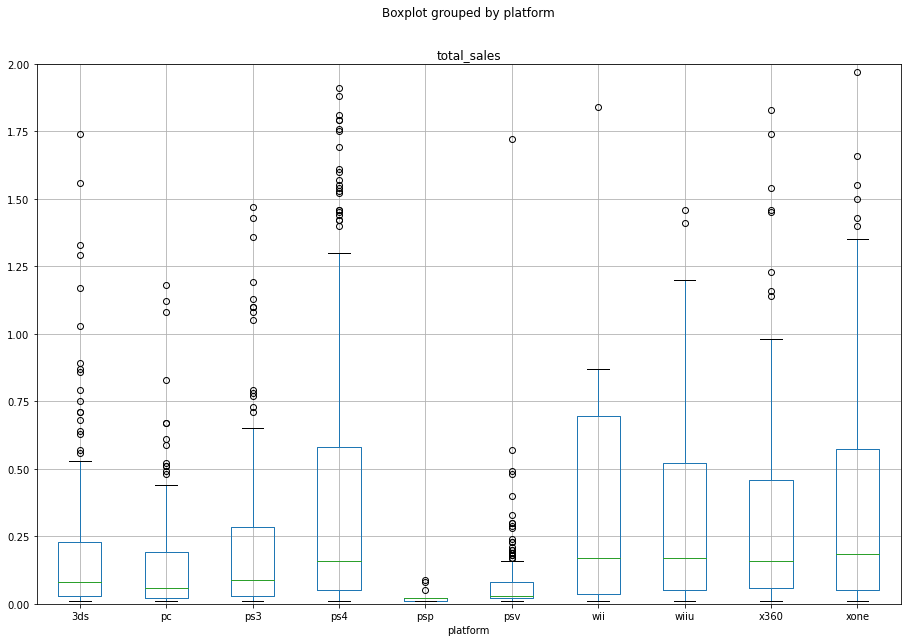

In [100]:
sales_platform.boxplot(column=['total_sales'], by='platform', figsize=(15, 10));
plt.ylim(0, 2)

In [101]:
platform_mean = sampledata.pivot_table(index=["platform", "name"], values="total_sales", aggfunc="mean")
platform_mean

total_sales
platform name                                    
3ds       beyblade burst                     0.03
          fire emblem fates                  1.56
          haikyu!! cross team match!         0.04
         12-sai. honto no kimochi            0.07
         12-sai. koisuru diary               0.05
...                                           ...
xone     wwe 2k16                            0.54
         wwe 2k17                            0.24
         xcom 2                              0.04
         zombie army trilogy                 0.10
         zombiu                              0.01

[1690 rows x 1 columns]

With a few exceptions, every platforms displays a very different situation; 

* PS2, PSP, PSV show very similar concentration of sales data: 75% of games earned between 0 and 0.15 aproximately.
* On the other end, PS3, PS4, X360 and XOne games sales data is very scattered.
* All platforms contain a considerable amount of outliers, very scattered.
* However, they all have a ver similar median, (see pivot table below for exact median values). 
* The Q3 in all of them is considerably bigger than their Q2. This shows some games might have much higher sales compared to other games from within the same platform. 


### 3.6 Sales & Reviews Correlation <a class="anchor" id="chapter3.6"></a>

We will now study the correlation between reviews and total sales. We will select a few current popular platforms to analize if there is any relation. PS4, XOne and 3DS.

In [102]:
ps4_reviews = sampledata.query('platform in "ps4"')
ps4_reviews

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,Unnamed: 0,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,NaN,12.25
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,245294.0,10.65
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,NaN,7.30
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,M,NaN,6.70
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,460091.0,6.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16502,root letter,ps4,2016,adventure,0.00,0.00,0.01,0.00,69.0,7.5,M,463247.0,0.01
16505,shin hayarigami 2,ps4,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,E,NaN,0.01
16528,dungeons 2,ps4,2016,role-playing,0.01,0.00,0.00,0.00,61.0,7.9,T,143566.0,0.01
16532,carmageddon: max damage,ps4,2016,action,0.01,0.00,0.00,0.00,51.0,5.5,M,128994.0,0.01


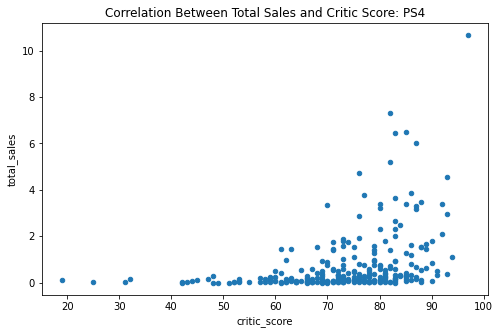

In [103]:
ps4_reviews.plot(x='critic_score',
                 y='total_sales', 
                 kind='scatter',
                 title = 'Correlation Between Total Sales and Critic Score: PS4',
                 figsize=(8, 5));

There is a mild positive correlation between the sales and critic score:
* There are barely any sales from games that are scored less than 40 points.
* Sales increase on games with scores 60 or above.
* Between 60 and 90 points, most games concentrate the sales below 2 million. 


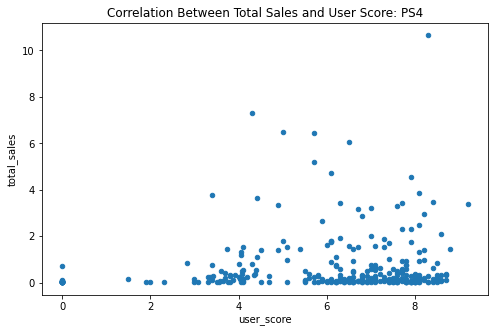

In [104]:
ps4_reviews.plot(x='user_score',
                 y='total_sales', 
                 kind='scatter',
                 title = 'Correlation Between Total Sales and User Score: PS4',
                 figsize=(8, 5));

There is almost no between Sales and User score.Sales increase as user score increases, however it is far from a defined positive correlation. There is a game that is scored with a 4, and has around 7million USD in sales, and another scored almost 10 that doesn't reach 4 million USD in sales.

In conclusion, reviews don't have a strong impact on sales.

**xOne**

Let's try to find a correlation on other current popular platforms, like xOne.

In [105]:
xone_reviews = sampledata.query('platform in "xone"')

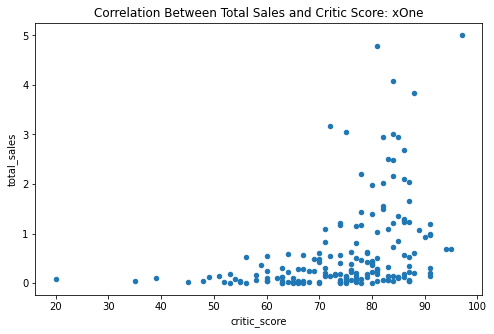

In [106]:
xone_reviews.plot(x='critic_score',
                 y='total_sales', 
                 kind='scatter',
                 title = 'Correlation Between Total Sales and Critic Score: xOne',
                 figsize=(8, 5));

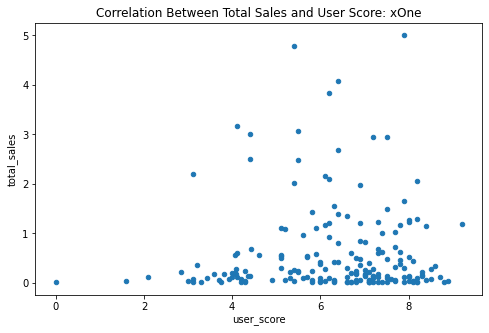

In [107]:
xone_reviews.plot(x='user_score',
                 y='total_sales', 
                 kind='scatter',
                 title = 'Correlation Between Total Sales and User Score: xOne',
                 figsize=(8, 5));

The xOne also shows no correlation between user reviews and sales. 
Critic scores however show **slightly** defined positive correlation; those games with a score over 70 seem to have higher sales.

### 3.7 Genres<a class="anchor" id="chapter3.7"></a>

From the Genres point of view, let's find out which ones have the highest and lowest sales globally:

In [108]:
sales_bygenre = sampledata.pivot_table(
    index="genre", 
    values="total_sales", 
    aggfunc="sum").sort_values("total_sales", ascending=False)

sales_bygenre

,total_sales
genre,
action,177.10
shooter,149.41
sports,95.12
role-playing,92.80
misc,33.52
fighting,25.49
racing,24.63
platform,16.28
adventure,15.73


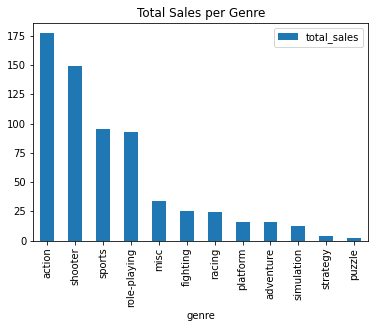

In [109]:
sales_bygenre.plot(title="Total Sales per Genre",
                       kind="bar");

In [110]:
# Number of games released per genre
sampledata["genre"].value_counts()

action          620
role-playing    221
adventure       185
sports          161
shooter         128
misc            113
racing           69
fighting         60
simulation       44
platform         38
strategy         37
puzzle           14
Name: genre, dtype: int64

The 2 top genres by global sales are action and shooter, followed by role-playing and sports.
The least sales are from genres puzzle and strategy. 

Action games genre also has the biggest amount of games in this dataset, so this could help the sales increase. On the other hand, there are only 14 puzzle games released between 2014 and 2016, which can explain the low amount of sales from that genre. 

(0.0, 3.0)

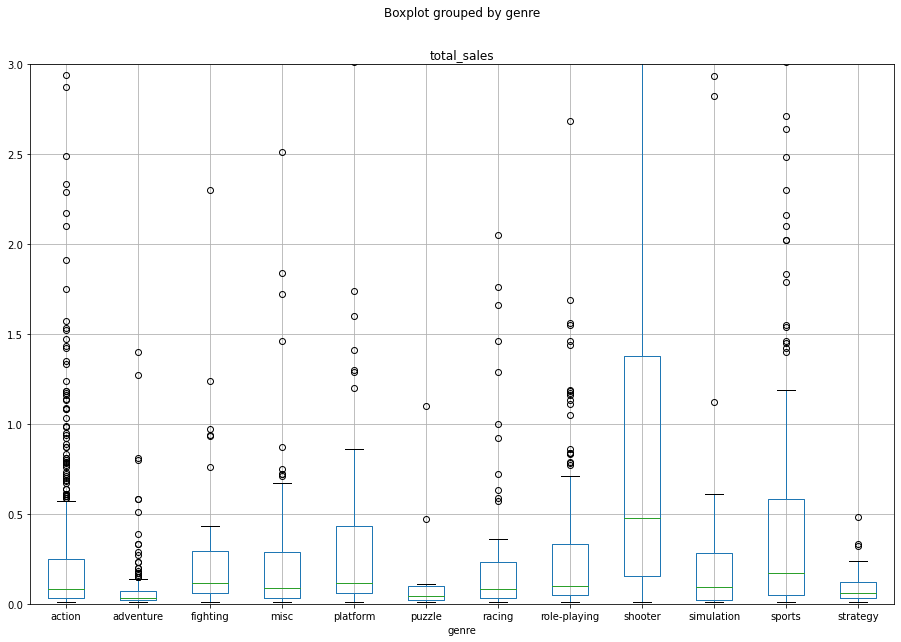

In [111]:
sampledata.boxplot(column=['total_sales'], by='genre', figsize=(15, 10));
plt.ylim(0, 3)

* The 2 genres with highest global sales (Action and Shooter), have very different distributions. Action games have a narrower distribution, compared to shooter, which has some games that brought a lot of revenue, and other games that brought much less. This shows that within the genre, some games are extremely popular and others aren't at all.
* Some action games (outliers) have brought a much higher revenue than most of the other action games.
* adventure and puzzle games on the other end have very low revenue from global sales.
* Medians across all genres are relatively similar, except shooter genre games.
* In all genres, sales above the median are more scattered than sales below the median.

### 3.8 Conclusion <a class="anchor" id="chapter3.8"></a>

In this section we have analyzed the data very thorough. These are our findings:

* The sales period with highest records is between 2005-2011.
* Platforms with highest sales have a positive skweness; by analyzing each on its own, we found that they reach sales peak within 1-2 years from the platform release, stays "popular" for 4 to 6 years, and fades in just 2-3 years. 
* We decided to narrow our dataset to the most relevant period As it is an industry with constant changes and improvements, we selected 2014 and 2016.

* Platforms leading in sales are PS4 and xOne.
* At the moment there are no "growing" platforms. But the most popular ones at this times are PS4 and XOne, which makes the the potentially profitable ones.


* The sales have a different behaviour across platforms. For example, the platforms with least global sales:
    * PS2, PSP, PSV show very similar concentration of sales data: 75% of games earned between 0 and 0.15 aproximately.
    * On the other end, PS3, PS4, X360 and XOne games sales data is very scattered.
    * All platforms contain a considerable amount of outliers, very scattered.
    * However, they all have a ver similar median, (see pivot table below for exact median values).
    * The Q3 in all of them is considerably bigger than their Q2. This shows some games might have much higher sales compared    to other games from within the same platform.

* We studied the correlation between reviews and sales on PS4 and saw that user reviews had no impact on sales, whereas critics reviews showed a very mild positive correlation. We compared other platforms, but they showed the same results.

* The most profitable genres are shooting and action. The least profitable are puzzles and strategy. 

## 4. Analyzing Data by Region <a class="anchor" id="chapter4"></a>

In [112]:
sales_region = sampledata.pivot_table(index="platform", values=["na_sales", "eu_sales", "jp_sales", "other_sales"], aggfunc="sum")
sales_region.sort_values("eu_sales", ascending=False)

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
ps4,130.04,15.02,98.61,44.48
xone,46.25,0.32,81.27,12.52
ps3,25.54,11.22,22.05,9.37
pc,18.22,0.00,7.29,1.89
3ds,16.12,44.24,22.64,3.68
x360,15.49,0.08,28.30,4.35
wiiu,13.15,7.31,19.36,3.16
psv,3.53,14.54,2.52,1.81
wii,2.59,0.00,2.08,0.40


In [113]:
eu_total = sales_region['eu_sales'].sum()
eu_total

270.9300000000002

In [114]:
na_total = sales_region['na_sales'].sum()
na_total

284.12000000000023

In [115]:
jp_total = sales_region['jp_sales'].sum()
jp_total

93.08999999999988

In [116]:
other_total = sales_region['other_sales'].sum()
other_total

81.6599999999999

In [117]:
sales_region['eu_sales_%'] = (sales_region['eu_sales']/eu_total)*100

In [118]:
sales_region['na_sales_%'] = (sales_region['na_sales']/na_total)*100

In [119]:
sales_region['jp_sales_%'] = (sales_region['jp_sales']/jp_total)*100

In [120]:
sales_region['other_sales_%'] = (sales_region['other_sales']/other_total)*100

In [121]:
sales_region.sort_values('eu_sales_%', ascending=False)

,eu_sales,jp_sales,na_sales,other_sales,eu_sales_%,na_sales_%,jp_sales_%,other_sales_%
platform,,,,,,,,
ps4,130.04,15.02,98.61,44.48,47.997638,34.707166,16.134923,54.469753
xone,46.25,0.32,81.27,12.52,17.070830,28.604111,0.343753,15.331864
ps3,25.54,11.22,22.05,9.37,9.426789,7.760805,12.052852,11.474406
pc,18.22,0.00,7.29,1.89,6.724984,2.565817,0.000000,2.314475
3ds,16.12,44.24,22.64,3.68,5.949876,7.968464,47.523902,4.506490
x360,15.49,0.08,28.30,4.35,5.717344,9.960580,0.085938,5.326965
wiiu,13.15,7.31,19.36,3.16,4.853652,6.814022,7.852616,3.869704
psv,3.53,14.54,2.52,1.81,1.302920,0.886949,15.619293,2.216507
wii,2.59,0.00,2.08,0.40,0.955966,0.732085,0.000000,0.489836


EU:
* PS4 is the leading platform in the market by far, followed by xOne.
* Wii and PSP have very low popularity , with barely any game sales.

JP:
* The leading platform is 3DS, contrary to the other regions, where this platform's popularity is average-low.
* The rest of the platforms are quite evenly distributed in the market
* Wii and PC have null popularity in the region.

NA:
* The most popular platform is PS4, followed by xOne.
* Least popular are Wii and PSP.

In [122]:
sales_genre = sampledata.pivot_table(index="genre", values=["na_sales", "eu_sales", "jp_sales", "other_sales"], aggfunc="sum")

In [123]:
sales_genre['eu_sales_%'] = ((sales_genre['eu_sales']/eu_total)*100).round()

In [124]:
sales_genre['na_sales_%'] = ((sales_genre['na_sales']/na_total)*100).round()

In [125]:
sales_genre['jp_sales_%'] = ((sales_genre['jp_sales']/jp_total)*100).round()

In [126]:
sales_genre['other_sales_%'] = ((sales_genre['other_sales']/other_total)*100).round()

In [127]:
sales_genre.sort_values("eu_sales", ascending=False)

,eu_sales,jp_sales,na_sales,other_sales,eu_sales_%,na_sales_%,jp_sales_%,other_sales_%
genre,,,,,,,,
action,74.93,29.58,72.59,22.61,28.0,26.0,32.0,28.0
shooter,65.52,4.87,79.02,21.53,24.0,28.0,5.0,26.0
sports,45.73,3.26,46.13,14.36,17.0,16.0,4.0,18.0
role-playing,28.17,31.16,33.47,8.64,10.0,12.0,33.0,11.0
racing,14.13,1.76,8.74,2.89,5.0,3.0,2.0,4.0
misc,12.86,5.61,15.05,4.03,5.0,5.0,6.0,5.0
simulation,7.30,2.31,2.63,0.89,3.0,1.0,2.0,1.0
platform,6.80,2.69,6.79,1.81,3.0,2.0,3.0,2.0
fighting,6.69,6.37,12.43,2.73,2.0,4.0,7.0,3.0


The most popular genre by region based on sales:

* Action games lead the market in EU, followed by shooter games.
* In NA, is inverse: shooter games make 28% of sales revenue in the region, followed by action games (26%).
* Role-playing leads the JP market with 33% revenue, followed very close by action games (32%)
* EU and NA have a relatively similar market distribution by genre. JP region differs considerably, as the sales are more equally spread along genres as well.

* Puzzle seems to be the least poopular genre across all regions. 
* Sport games generate at least 4 times more revenue share in EU and NA than in JP. 


ESRB Correlation with Sales by region

In [128]:
sampledata.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,Unnamed: 0,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,NaN,12.25
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,245294.0,10.65
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,T,NaN,10.94
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,NaN,7.30
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,M,NaN,6.70


In [129]:
sampledata['rating']=sampledata['rating'].astype('category').cat.codes

In [130]:
sampledata['rating'].corr(sampledata['na_sales'])

-0.008216935081707302

In [131]:
sampledata['rating'].corr(sampledata['eu_sales'])

-0.040791173978398536

In [132]:
sampledata['rating'].corr(sampledata['jp_sales'])

0.09355547644659419

In [133]:
sampledata['rating'].corr(sampledata['other_sales'])

-0.018432137425744895

The only region with a relatively defined correlation between ESRB ratings and sales is JP. However, it is still far from acknowledging that ERSB ratings have an impact on sales.

### 4.1 Conclusion<a class="anchor" id="chapter4.1"></a>

In this section we have analyzed the data by region, focusing on what defined the high sales in each of them. 
* PS4 and xOne are the most popular platforms in NA and EU, whereas 3ds is leading in JP with a big difference from the rest of platforms.
* Most popular genres are shooting and action in NA and EU, whereas role-playing and action are the lead in JP.
* Puzzle is the least popular genre in all markets. 
* ESRB ratings have very low impact on sales across all regions, although JP region shows a higher correlation (9% only).

Overall, EU and NA regions have a similar behavior on preferred platforms and genres, whereas JP is more on its own.

A reason of these different behaviours could be the culture the regions come from. EU and NA are both known as "Western Civilization", with very similar beliefs, cultural backgrounds and history even. JP region on the other hand has a totally different culture, habits and even social life - which could perhaps explain why they prefer role-playing. These are just written thoughts.  

## 5. Hypothesis <a class="anchor" id="chapter5"></a>

Based on data collected, we will study the probability of the following hypotheses.
* H0 = Average user ratings of the Xbox One and PC platforms are the same.
* H1 = Average user ratings of the Xbox One and PC platforms are different.

In [134]:
import scipy.stats as st

In [135]:
reviews = sampledata[sampledata['user_score'].notnull()]
reviews

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,Unnamed: 0,total_sales
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,3,245294.0,10.65
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,1,NaN,7.30
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,3,460091.0,6.43
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,1,26371.0,6.49
105,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,6.5,3,207051.0,6.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16662,prison architect,xone,2016,action,0.01,0.00,0.00,0.00,74.0,6.7,4,24545.0,0.01
16670,fujiko f. fujio characters: great assembly! sl...,3ds,2014,action,0.00,0.00,0.01,0.00,NaN,0.0,4,234313.0,0.01
16686,7'scarlet,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,0.0,1,438732.0,0.01
16694,metal gear solid v: ground zeroes,pc,2014,action,0.00,0.01,0.00,0.00,80.0,7.6,3,268253.0,0.01


In [136]:
xone = reviews.query('platform in "xone"')

In [137]:
st.shapiro(xone.user_score)

ShapiroResult(statistic=0.95131516456604, pvalue=5.6970388868649025e-06)

In [138]:
pc = reviews.query('platform in "pc"')

In [139]:
st.shapiro(pc.user_score)

ShapiroResult(statistic=0.9510374069213867, pvalue=0.00017543445574119687)

As both provide a p < 0.05, we confirm neither of them have a normal distribution. This means we need to use the counter test method of ttest: The Mann Whitney U test. Before that, we need to get rid of the outliers.

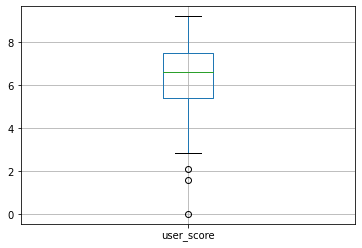

In [140]:
xone.boxplot(column='user_score', return_type='axes');

We only have outliers below the minimum, which represent very few games that have been rated with a ver  low score by users. 

In [141]:
Q1_xone = xone['user_score'].quantile(0.25)
Q3_xone = xone['user_score'].quantile(0.75)
IQR_xone = Q3_xone - Q1_xone

There are outliers only below the Q1 (not above Q3), so let's calculate the limit:

In [142]:
xone_outliers = Q1_xone-1.5*IQR_xone

print("{:.2f}".format(xone_outliers))

2.25


Any user score below 2.25 will be considered an outlier, so we need to get rid of them in order to do the Mann Whitney U test.

In [143]:
xone = xone[xone["user_score"]>= xone_outliers]
xone

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,Unnamed: 0,total_sales
165,grand theft auto v,xone,2014,action,2.81,2.19,0.00,0.47,97.0,7.90,3,245294.0,5.00
179,call of duty: advanced warfare,xone,2014,shooter,3.22,1.55,0.01,0.48,81.0,5.40,3,460091.0,4.78
242,halo 5: guardians,xone,2015,shooter,2.78,1.27,0.03,0.41,84.0,6.40,4,460205.0,4.08
270,fallout 4,xone,2015,role-playing,2.51,1.32,0.01,0.38,88.0,6.20,3,207051.0,3.84
373,assassin's creed: unity,xone,2014,action,2.27,0.90,0.00,0.33,72.0,4.10,3,NaN,3.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16599,saints row: gat out of hell,xone,2015,action,0.00,0.01,0.00,0.00,65.0,6.00,3,NaN,0.01
16632,sébastien loeb rally evo,xone,2016,racing,0.00,0.01,0.00,0.00,63.0,8.20,1,NaN,0.01
16645,rugby challenge 3,xone,2016,sports,0.00,0.01,0.00,0.00,NaN,6.60,1,153346.0,0.01
16647,zombiu,xone,2016,action,0.00,0.01,0.00,0.00,NaN,3.75,4,172453.0,0.01


Let's do the same with the pc:

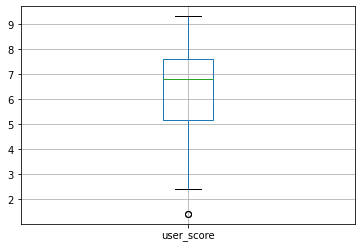

In [144]:
pc.boxplot(column='user_score', return_type='axes');

In [145]:
Q1_pc = pc['user_score'].quantile(0.25)
Q3_pc = pc['user_score'].quantile(0.75)
IQR_pc = Q3_pc - Q1_pc

In [146]:
pc_outliers = Q1_pc-1.5*IQR_pc
pc_outliers

1.4749999999999992

In [147]:
pc = pc[pc["user_score"]>= pc_outliers]
pc

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,Unnamed: 0,total_sales
458,the sims 4,pc,2014,simulation,1.00,1.82,0.0,0.23,70.0,3.9,4,319238.0,2.82
1531,fallout 4,pc,2015,role-playing,0.51,0.67,0.0,0.10,84.0,5.4,3,207051.0,1.18
1731,grand theft auto v,pc,2015,action,0.39,0.69,0.0,0.09,96.0,7.9,3,245294.0,1.08
2304,the elder scrolls online,pc,2014,role-playing,0.32,0.51,0.0,0.07,71.0,5.7,3,311285.0,0.83
2785,dragon age: inquisition,pc,2014,role-playing,0.33,0.34,0.0,0.06,85.0,5.9,3,185802.0,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16455,act of aggression,pc,2015,strategy,0.00,0.01,0.0,0.00,71.0,7.1,4,327621.0,0.01
16458,fallout anthology,pc,2015,action,0.00,0.01,0.0,0.00,NaN,8.3,4,234050.0,0.01
16465,trackmania turbo,pc,2016,action,0.00,0.01,0.0,0.00,79.0,6.8,1,NaN,0.01
16511,ride 2,pc,2016,racing,0.00,0.01,0.0,0.00,78.0,7.9,1,268575.0,0.01


In [148]:
s, p = st.mannwhitneyu(xone.user_score, pc.user_score, alternative="two-sided")
s, p

(11222.5, 0.9359962247617861)

In [149]:
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Same distribution (fail to reject H0)


Since p > alpha, we fail to reject H0 "Average user ratings of the Xbox One and PC platforms are the same"

Let's move on to the next hypotheses:
* H0 = Average user ratings for the Action and Sports genres are EQUAL.
* H1 = Average user ratings for the Action and Sports genres are DIFFERENT.

As we did before, let's test if we are working with normal distributions or not.

In [150]:
reviews

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,Unnamed: 0,total_sales
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,3,245294.0,10.65
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,1,NaN,7.30
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,3,460091.0,6.43
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,1,26371.0,6.49
105,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,6.5,3,207051.0,6.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16662,prison architect,xone,2016,action,0.01,0.00,0.00,0.00,74.0,6.7,4,24545.0,0.01
16670,fujiko f. fujio characters: great assembly! sl...,3ds,2014,action,0.00,0.00,0.01,0.00,NaN,0.0,4,234313.0,0.01
16686,7'scarlet,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,0.0,1,438732.0,0.01
16694,metal gear solid v: ground zeroes,pc,2014,action,0.00,0.01,0.00,0.00,80.0,7.6,3,268253.0,0.01


In [151]:
action = reviews.query('genre in "action"')

In [152]:
st.shapiro(action.user_score)

ShapiroResult(statistic=0.833488941192627, pvalue=6.718037171494059e-20)

In [153]:
sports=  reviews.query('genre in "sports"')

In [154]:
st.shapiro(sports.user_score)

ShapiroResult(statistic=0.9580489993095398, pvalue=0.0004187525773886591)

Just like before, neither of them have a normal distribution, as p < 0.05. We will proceed with the Mann Whitney U test like before. First, outliers:

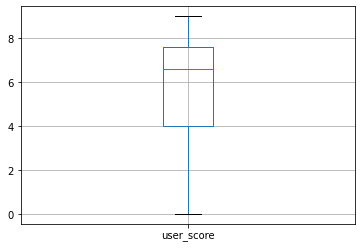

In [155]:
action.boxplot(column='user_score', return_type='axes');

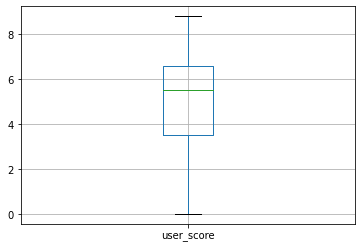

In [156]:
sports.boxplot(column='user_score', return_type='axes');

No outliers at all.

In [157]:
s, p = st.mannwhitneyu(action.user_score, sports.user_score, alternative="two-sided")
s, p

(31818.5, 0.00017288376920415624)

In [158]:
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Different distribution (reject H0)


After running the Mannwhitneyt test again, we confirm that we can reject our initial hypothesis: " Average user ratings for the Action and Sports genres are EQUAL."

## 6. Overall Conclusion <a class="anchor" id="chapter6"></a>

The first thing that should be mentioned, is how outdated and low maintained the dataset we received is. It had a big amount of missing values that could have been perfectly filled by keeping an eye on reviews. 

We tried to fill as many missing values as possible by merging the dataset with another reliable dataset found online. However, there we still a considerable amount of missing values, too many to just ignore them. 

As we couldn't fill them in with a 0 or median/mean, because it would impact the results too much, we decided to change the whole column to numeric in order to be able to pull calculations and visualizations.

We have also created a new column that holds the total sales of each game (result from adding the sales in each region).

Once data was preprocessed, we analyzed it to understand the industry.
* **Game Released per year:**
    * 1980 to 1993: Lowest period recorded. Less than 100 games released per year.
    * 2005 to 2011: highest sales globally
    * 2008 to 2009: peak sales globally
    * 2011 to present time: sales decreased by over 50%

* **Sales by Platform**
    * Platforms with the largest share of global sales are (in descendant order): PS2, x360, Wii, PS3. Note that this is the sales over time. A more accurate calculation would be average sales per year, so it accounts for the years the platforms existed. 
    * Only 10 out of 30 platforms are profitable: S2, x360, Wii, PS3, DS, PS, GBA and PS4.
* **Platform popularity** lasts for 5 to 6 years, and it fades in about 3 years - probably due to new platforms coming to the market.
*  **Sample Data: 2014 to 2016**
    * PS4 is the platforms with the highest revenue, based on global sales between 2014 and 2016.
    * PSP and Wii are the lowest by far. 
    * There is no correlation between user reviews and sales. 
    * There is a slight positive correlation between critic reviews and sales, but still far from being a perfect positive correlation. 
    * Sales by genre display a big amount of outliers. However we could draw some conclusions:
        * The 2 genres with highest global sales (Action and Shooter), have very different distributions. Action games have a narrower distribution, compared to shooter. This means action games createa  similar revenue, whereas among shooter games, some have a very high number of sales, creating much more revenue than those who are not sold as much. 
        * Some action games (outliers) have brought a much higher revenue than most of the other action games.
        * adventure and puzzle games on the other end have very low revenue from global sales.
        * Medians across all genres are relatively similar, except shooter games.
        * In all genres, sales above the median are more scattered than sales below the median. Each genre has a few games that have an extraordinary amount of revenue compared to most games from that same genre. 
* **Analysis by Region:**
    * EU and NA have very similar market behaviour, whereas JP is on its own.
    * Most popular Platforms:
        * EU: PS4 accounts for 48% of sales in the region (almost half of region sales revenue!), and xOne 17%
        * NA: PS4 35% of sales in the region, and xOne not far from it, at 28%
        * JP: DS3 holds almost 50% of the sales revenue in the region, followed by PS4 with only 15%.
        * Other regions: PS4 seems to be the lead, with 54% of sales revenue. 
    * Most popular Genres:
        * EU: Action and Shooter genres are the most popular, accounting for 28% and 26% of regional sales respectively.
        * NA: same genres as in EU, but here Action holds 26% of the regional sales, and shooting 28%
        * JP: Role-playing and action genres are the absolute leads in sales for the region, representing 33% and 32%. The other genres account for less than 10% each. 
    * ERSB Ratings: The only region with a relatively defined correlation between ESRB ratings and sales is JP. However, it is still far from acknowledging that ERSB ratings have an impact on sales.
    
* **Testing Hypotheses:**
    * we fail to reject H0 "Average user ratings of the Xbox One and PC platforms are the same", meaning the samples are very close to being the same
    * we confirm that we can reject our initial hypothesis: " Average user ratings for the Action and Sports genres are EQUAL"